In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

from category_encoders import TargetEncoder

In [2]:
NYtraffic = pd.read_csv('~/Data Science Labs/Project Datasets/NY Traffic Accidents/monroe-county-crash-data2003-to-2015.csv', encoding = 'latin1')
# Get rid of the question mark in the Weekend? column and make all columns the same style (no underscores)
NYtraffic.rename({'Weekend?':'Weekend', 'Reported_Location':'Reported Location'}, axis = 1, inplace = True)
NYtraffic.head()

,Master Record Number,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Primary Factor,Reported Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [3]:
#NYtraffic = NYtraffic.drop(['Master Record Number','Primary Factor','Reported Location','Latitude','Longitude'],axis = 1)
NYtraffic.head(20)

,Master Record Number,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Primary Factor,Reported Location,Latitude,Longitude
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
5,902364664,2015,1,6,Weekday,1800.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BURKS & WALNUT,39.126670,-86.531370
6,902364682,2015,1,6,Weekday,1200.0,2-Car,No injury/unknown,DRIVER DISTRACTED - EXPLAIN IN NARRATIVE,SOUTH CURRY PIKE LOT 71,39.150825,-86.584899
7,902364683,2015,1,6,Weekday,1400.0,1-Car,Incapacitating,ENGINE FAILURE OR DEFECTIVE,NORTH LOUDEN RD,39.199272,-86.637024
8,902364714,2015,1,7,Weekend,1400.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,LIBERTY & W 3RD,39.164610,-86.579130
9,902364756,2015,1,7,Weekend,1600.0,1-Car,No injury/unknown,RAN OFF ROAD RIGHT,PATTERSON & W 3RD,39.163440,-86.551280


In [4]:
NYtraffic['DayofMonth'] = NYtraffic['Month']

In [5]:
#Can I convert year and month to a datetime?

#Yeardate = pd.to_datetime(NYtraffic.Year, format = '%Y')
Yeardate = pd.to_datetime((NYtraffic.Year*10000+NYtraffic.Month*100+NYtraffic.DayofMonth).apply(str),format='%Y%m%d')

In [6]:
Yeardate

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
53938   2003-10-10
53939   2003-11-11
53940   2003-12-12
53941   2003-12-12
53942   2003-12-12
Length: 53943, dtype: datetime64[ns]

In [7]:
NYtraffic['TSDate'] = Yeardate

In [8]:
NYtraffic.head()

,Master Record Number,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Primary Factor,Reported Location,Latitude,Longitude,DayofMonth,TSDate
0,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,1,2015-01-01
1,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,1,2015-01-01
2,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,1,2015-01-01
3,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,1,2015-01-01
4,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,1,2015-01-01


In [9]:
NYtraffic_ts = NYtraffic.set_index('TSDate')

In [10]:
NYtraffic_ts.head()

,Master Record Number,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Primary Factor,Reported Location,Latitude,Longitude,DayofMonth
TSDate,,,,,,,,,,,,,
2015-01-01,902363382,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874,1
2015-01-01,902364268,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848,1
2015-01-01,902364412,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890,1
2015-01-01,902364551,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956,1
2015-01-01,902364615,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625,1


In [11]:
NYtraffic_ts.isnull().sum()
NYtraffic_ts.drop(NYtraffic_ts[NYtraffic_ts['Collision Type'].isnull()].index, inplace = True)

In [12]:
NYtraffic_ts.groupby('Year')['Collision Type'].agg('count')

Year
2003    3285
2004    3840
2005    3967
2006    3937
2007    4055
2008    3965
2009    4014
2010    4060
2011    3914
2012    4223
2013    4058
2014    4167
2015    4313
Name: Collision Type, dtype: int64

In [13]:
# plt.plot(NYtraffic_ts.index, NYtraffic_ts['Collision Type'].value_counts())
# plt.title('GM Stock Price')
# plt.ylabel('Price ($)');
# plt.show()
NYtraffic_ts['Collision Type'].value_counts()

2-Car               36017
1-Car                9914
3+ Cars              3006
Moped/Motorcycle      971
Bus                   817
Pedestrian            605
Cyclist               468
Name: Collision Type, dtype: int64

In [14]:
NYtraffic_dropped = NYtraffic[['Year','Month','Day','Weekend','Hour','Collision Type','Injury Type']]

In [15]:
# Convert Hour column to 3 categories, Peak Hour, Off-Peak Day, Off-Peak Night
# 1: Peak Hour is 6am-9:59am and 3pm - 6:59pm
# 2: Off-Peak Day is 10am - 2:59pm
# 3: Off-Peak Night is 7pm - 5:59am

def create_peak_class(x):
    
    if ((x >= 600.0) & (x < 1000.0)) | ((x >= 1500.0) & (x < 1900.0)):
        peak_class = 1

    elif (x >= 1000.0) & (x < 1500.0):
        peak_class = 2
        
    else:
        peak_class = 3
        
    return peak_class

peak_class = []
for i in NYtraffic_dropped.Hour:
    peak_class.append(create_peak_class(i))

NYtraffic_dropped['Peak Hour Class'] = peak_class
NYtraffic_dropped.head()

C:\Users\wibby\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Peak Hour Class
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,3
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,1
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,3
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,1
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,2


In [16]:
def create_injury_binary(x):
    if x == 'No injury/unknown':
        injury_binary = 0
    else:
        injury_binary = 1
    return injury_binary

injury_binary = []
for i in NYtraffic_dropped['Injury Type']:
    injury_binary.append(create_injury_binary(i))

NYtraffic_dropped['Injury Binary'] = injury_binary

NYtraffic_dropped.sample(20)

C:\Users\wibby\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Year,Month,Day,Weekend,Hour,Collision Type,Injury Type,Peak Hour Class,Injury Binary
23460,2010,8,2,Weekday,1300.0,2-Car,Non-incapacitating,2,1
24529,2010,7,3,Weekday,700.0,2-Car,No injury/unknown,1,0
12003,2013,9,7,Weekend,300.0,1-Car,No injury/unknown,3,0
45995,2004,12,6,Weekend,2100.0,2-Car,No injury/unknown,3,0
27321,2009,7,3,Weekday,1700.0,2-Car,Non-incapacitating,1,1
53808,2003,4,6,Weekday,1100.0,2-Car,No injury/unknown,2,0
42628,2005,5,1,Weekend,1600.0,2-Car,No injury/unknown,1,0
53637,2003,6,3,Weekday,200.0,2-Car,Non-incapacitating,3,1
16038,2012,1,5,Weekday,1100.0,2-Car,No injury/unknown,2,0
46263,2004,3,2,Weekday,1300.0,2-Car,No injury/unknown,2,0


In [17]:
NY_injury_year_agg = NYtraffic_dropped.groupby(['Year','Injury Binary'])[['Injury Binary']].agg('count')
NY_injury_year_agg

Injury Binary
Year Injury Binary               
2003 0                       3630
     1                        995
2004 0                       3027
     1                       1242
2005 0                       2851
     1                       1116
2006 0                       2875
     1                       1062
2007 0                       3111
     1                        944
2008 0                       3455
     1                        886
2009 0                       3129
     1                        885
2010 0                       3121
     1                        939
2011 0                       3074
     1                        840
2012 0                       3270
     1                        953
2013 0                       3269
     1                        789
2014 0                       3335
     1                        832
2015 0                       3456
     1                        857

<Figure size 1440x720 with 0 Axes>

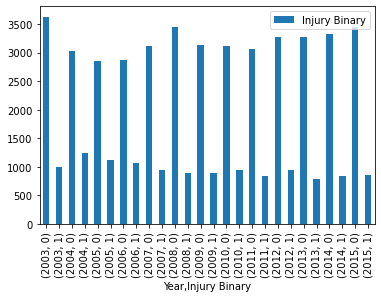

In [18]:
plt.figure(figsize=(20,10))
NY_injury_year_agg.plot(kind = 'bar')

In [19]:
NYtraffic_dropped = pd.get_dummies(data = NYtraffic_dropped, columns = ['Weekend'])

NYtraffic_dropped

,Year,Month,Day,Hour,Collision Type,Injury Type,Peak Hour Class,Injury Binary,Weekend_Weekday,Weekend_Weekend
0,2015,1,5,0.0,2-Car,No injury/unknown,3,0,1,0
1,2015,1,6,1500.0,2-Car,No injury/unknown,1,0,1,0
2,2015,1,6,2300.0,2-Car,Non-incapacitating,3,1,0,1
3,2015,1,7,900.0,2-Car,Non-incapacitating,1,1,0,1
4,2015,1,7,1100.0,2-Car,No injury/unknown,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,1700.0,2-Car,No injury/unknown,1,0,1,0
53939,2003,11,3,800.0,1-Car,No injury/unknown,1,0,1,0
53940,2003,12,5,1200.0,2-Car,No injury/unknown,2,0,1,0
53941,2003,12,1,700.0,2-Car,No injury/unknown,1,0,0,1


Text(0.5, 1.0, 'Injuries per Vehicle')

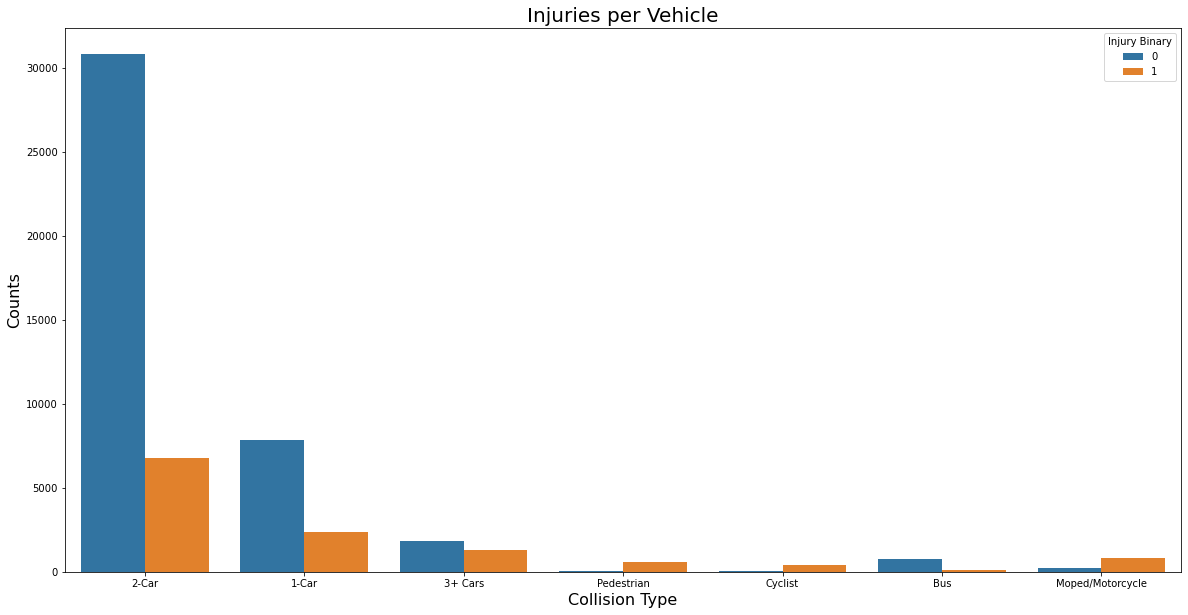

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Collision Type', data = NYtraffic_dropped, hue = 'Injury Binary')

plt.xlabel("Collision Type", size = 16)
plt.ylabel("Counts", size = 16)
plt.title("Injuries per Vehicle", size = 20)

Text(0.5, 1.0, 'Injuries In and Out of Peak Hour')

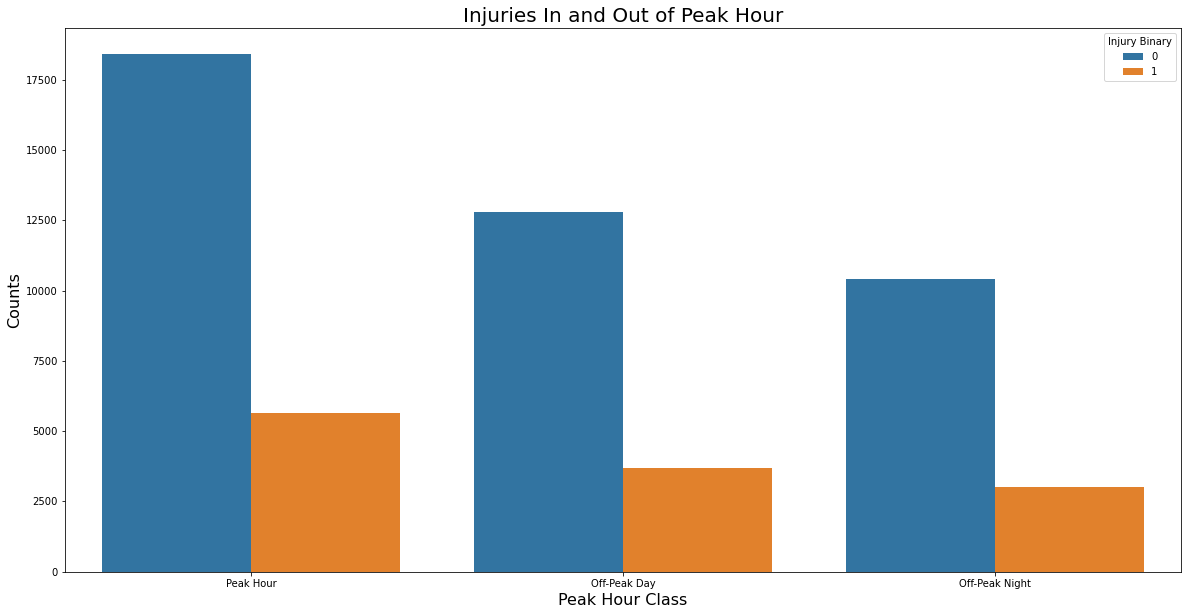

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Peak Hour Class', data = NYtraffic_dropped, hue = 'Injury Binary')

plt.xlabel("Peak Hour Class", size = 16)
plt.xticks([0,1,2],["Peak Hour","Off-Peak Day","Off-Peak Night"])
plt.ylabel("Counts", size = 16)
plt.title("Injuries In and Out of Peak Hour", size = 20)

In [22]:
NYtraffic_cycped = NYtraffic_dropped[(NYtraffic_dropped['Collision Type'] == 'Pedestrian') | (NYtraffic_dropped['Collision Type'] == 'Cyclist') | (NYtraffic_dropped['Collision Type'] == 'Moped/Motorcycle')]

In [23]:
NYtraffic_cycped['TSDate'] = NYtraffic['TSDate']
NYtraffic_cycped.head()

C:\Users\wibby\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,Day,Hour,Collision Type,Injury Type,Peak Hour Class,Injury Binary,Weekend_Weekday,Weekend_Weekend,TSDate
38,2015,1,7,1800.0,Pedestrian,Incapacitating,1,1,0,1,2015-01-01
60,2015,1,5,1800.0,Cyclist,Incapacitating,1,1,1,0,2015-01-01
98,2015,1,3,1100.0,Pedestrian,Non-incapacitating,2,1,1,0,2015-01-01
104,2015,1,3,2300.0,Pedestrian,Incapacitating,3,1,1,0,2015-01-01
133,2015,1,7,200.0,Pedestrian,Non-incapacitating,3,1,0,1,2015-01-01


Text(0.5, 1.0, 'Injuries per Vehicle - Small Vehicles')

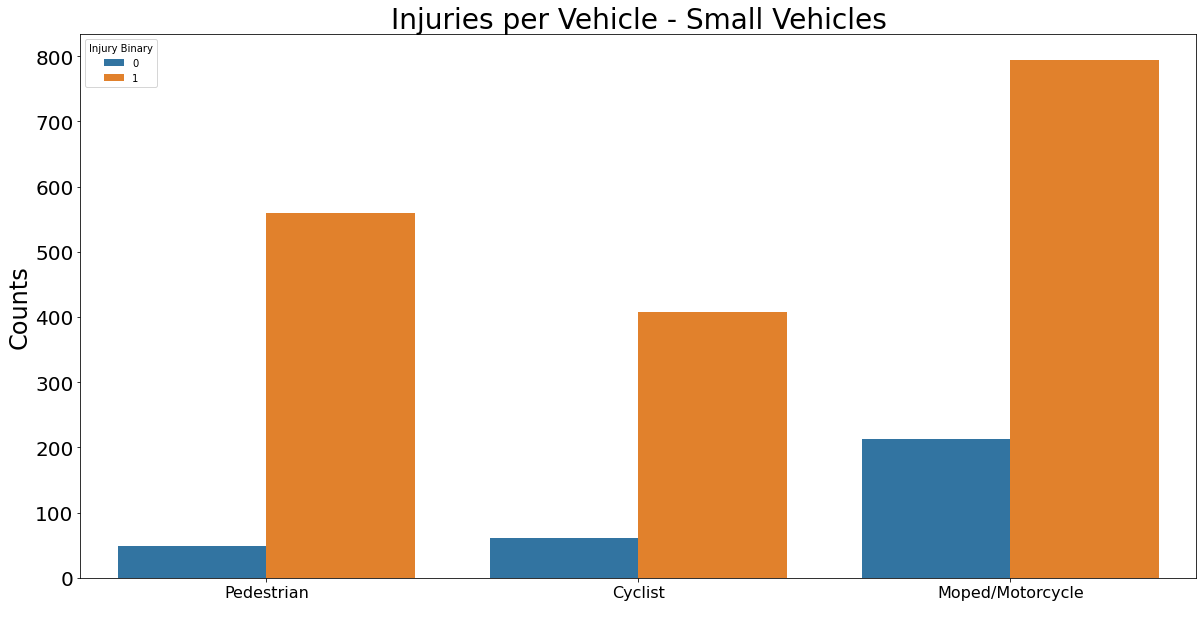

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Collision Type', data = NYtraffic_cycped, hue = 'Injury Binary')

plt.xticks(size = 16)
plt.xlabel(" ", size = 24)
plt.yticks(size = 20)
plt.ylabel("Counts", size = 24)
plt.title("Injuries per Vehicle - Small Vehicles", size = 28)

Text(0.5, 1.0, 'Injury-Prone Vehicles per Month')

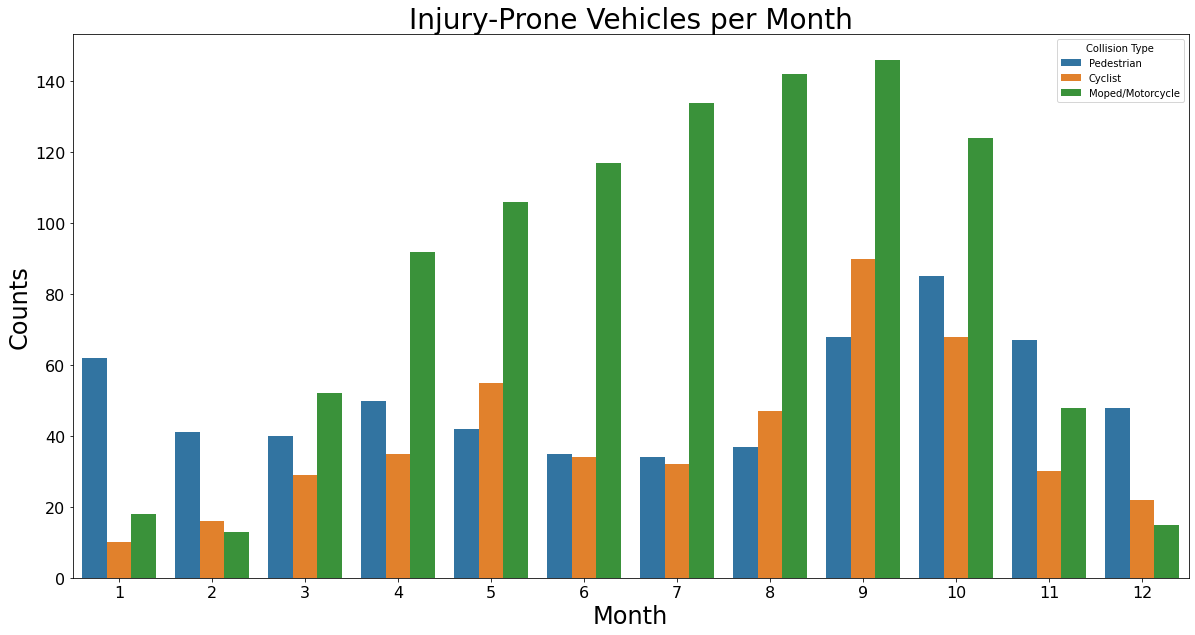

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Month', data = NYtraffic_cycped, hue = 'Collision Type')

plt.xticks(size = 16)
plt.xlabel("Month", size = 24)
plt.yticks(size = 16)
plt.ylabel("Counts", size = 24)
plt.title("Injury-Prone Vehicles per Month", size = 28)

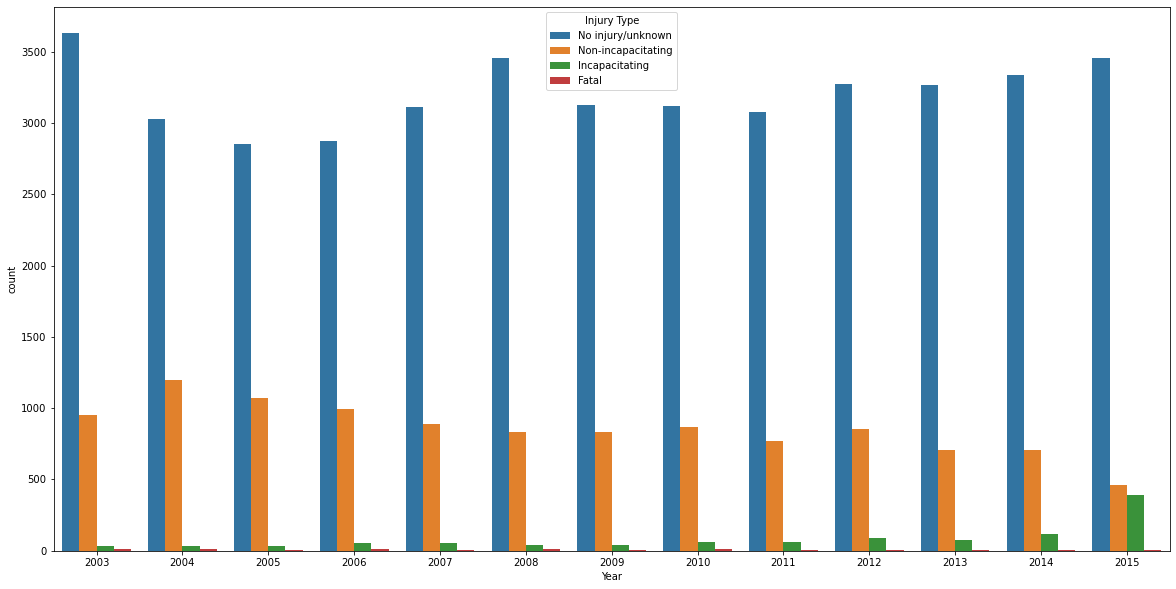

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Year', data = NYtraffic_dropped, hue = 'Injury Type')

Text(0.5, 1.0, 'Injuries per Time of Day')

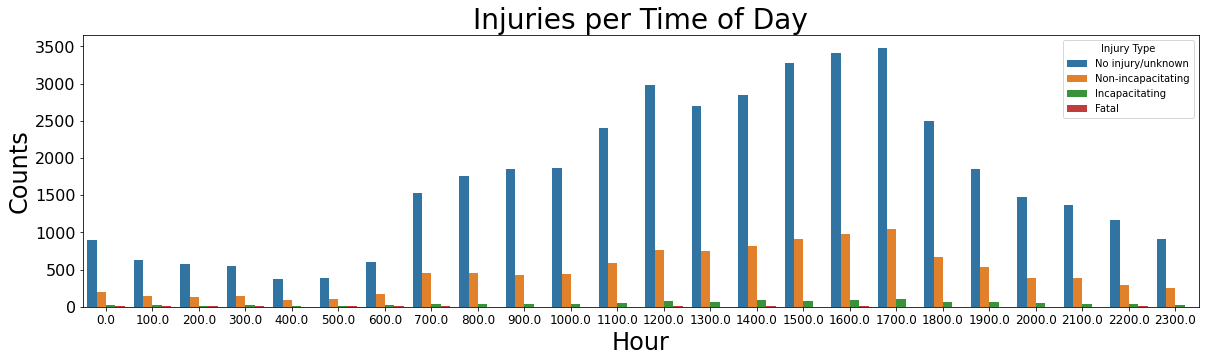

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'Hour', data = NYtraffic_dropped, hue = 'Injury Type')

plt.xticks(size = 12)
plt.xlabel("Hour", size = 24)
plt.yticks(size = 16)
plt.ylabel("Counts", size = 24)
plt.title("Injuries per Time of Day", size = 28)

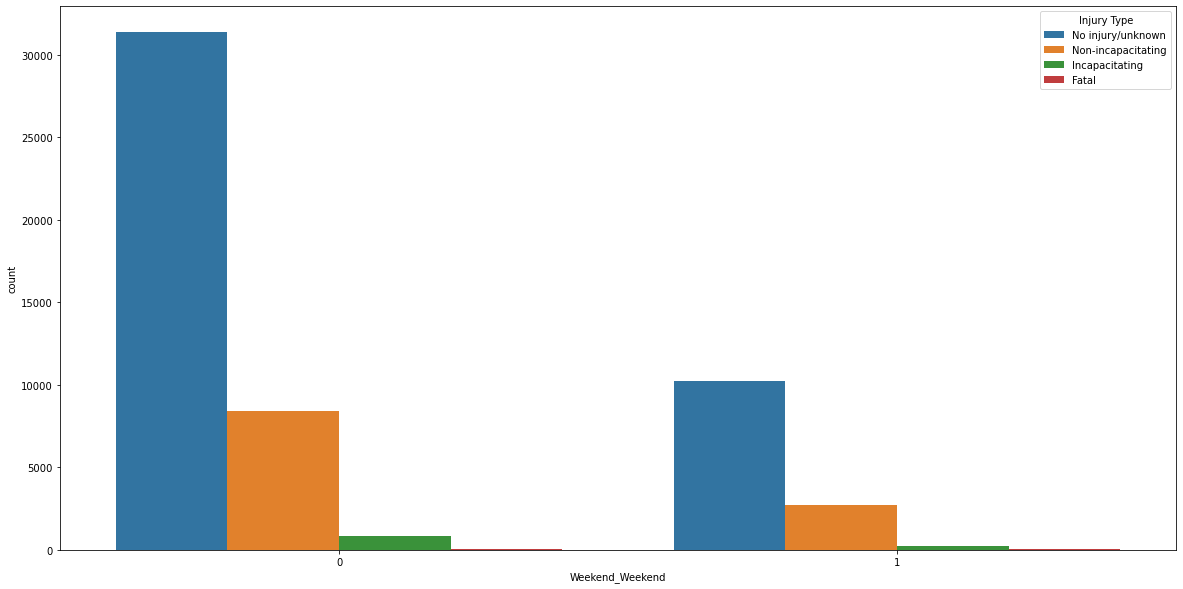

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Weekend_Weekend', data = NYtraffic_dropped, hue = 'Injury Type')

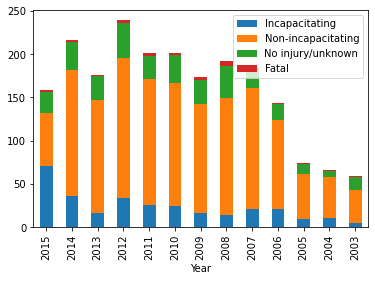

In [27]:
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('Year','Injury Type',NYtraffic_cycped).plot(kind='bar',stacked=True)